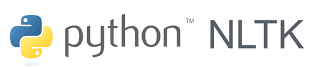

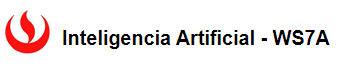

## NLP - Creación de Gramáticas con NLTK

In [55]:
# install the requirements
#!pip install nltk
#!python -m nltk.downloader book

# Resumen de NLTK: Análisis sintáctico

Este resumen se corresponde con el capítulo 8 del NLTK Book [Analyzing Sentence Structure](http://www.nltk.org/book/ch08.html). La lectura del capítulo es muy recomendable.


En este resumen vamos a repasar cómo crear gramáticas con NLTK y cómo crear herramientas que nos permitan analizar sintácticamente oraciones sencillas.

Para empezar, necesitamos importar el módulo `nltk` que nos da acceso a todas las funcionalidades:

In [56]:
import nltk

## Gramáticas Independientes del Contexto (CFG)

**Noam Chmosky** definió una [jerarquía de lenguajes y gramáticas](http://es.wikipedia.org/wiki/Jerarqu%C3%ADa_de_Chomsky) que se utiliza habitualmente en Lingüística e Informática para clasificar lenguajes y gramáticas formales. Cuando queremos modelar fenómenos lingüísticos de las lenguas naturales, el tipo de gramática más adeacuado es el conocido como Tipo 2 o [Gramáticas Independientes del Contexto](http://es.wikipedia.org/wiki/Gram%C3%A1tica_libre_de_contexto) o **Context-Free Grammars (CFG)** en inglés.

Vamos a definir una gramática simplemente como un conjunto de reglas de reescritura o transformación. Sin entrar en muchos detalles sobre las restricciones que tienen que cumplir las reglas de las gramáticas de Tipo 2, es importante que tengamos en cuenta lo siguiente:

- Las gramáticas formales manejan dos tipos de alfabetos.
  1. Los **símbolos no terminales** son los componentes intermedios que utilizamos en las reglas. Todo símbolo no terminal tiene que ser definido como una secuencia de otros símbolos. En nuestro caso, los no terminales van a ser las categorías sintácticas. 
  2. Los **símbolos terminales** son los componentes finales reconocidos por la gramática. En nuestro caso, los terminales van a ser **las palabras de las oraciones que queremos analizar sintácticamente**.
- Todas las reglas de una gramática formal tienen la forma `Símbolo1 -> Símbolo2, Símbolo3... SímboloN` y se leen como *el `Símbolo1` se define/está formado/se reescribe como una secuencia formada por `Símbolo2`, `Símbolo3`, etc.*
- En las gramáticas independientes del contexto, la parte situada a la izquierda de la flecha `->` es siempre un único símbolo no terminal.

## Gramáticas Generativas en NLTK

Pues bien, para definir nuestras gramáticas en NLTK podemos escribirlas en un fichero aparte o como una cadena de texto siguiendo el formalismo de las **gramaticas generativas de Chomsky**. Vamos a definir una sencilla gramática capaz de reconocer la famosa frase de los hermanos Marx: *I shot an elephant in my pajamas*, y la vamos a guardar como una cadena de texto en la variable `g1`.

In [57]:
g1 = """
S -> NP VP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
PP -> P NP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
"""

Fíjate cómo hemos definido nuestra gramática:

- Hemos encerrado todo entre triples comillas dobles. Recuerda que esta sintaxis de Python permite crear cadenas que contengan retornos de carro y ocupen más de una línea de longitud.
- Para los no terminales utilizamos las convenciones habituales para las estructuras sintácticas y las categorías de palabras y los escribimos en mayúsculas. Las etiquetas son autoexplicativas, aunque estén en inglés.
- Los terminales van escritos entre comillas simples.
- Cuando un terminal se puede definir de más de una forma, marcamos la disyunción con la barra vertical **`|`**. 
- Tenemos reglas que se interpretan de la siguiente manera: *una oración se define como una sintagma nominal y un sintagma verbal*; *un sintagma nominal se define como un determinante y un nombre, o un determinante, un nombre y un sintagma preposicional, o la palabra I*, etc.

A partir de nuestra gramática en una cadena de texto, necesitamos crear un analizador que podamos utilizar posterioremente. Para ello, es imprescindible parsearla antes con el método `nltk.CFG.fromstring()`.

In [58]:
grammar1 = nltk.CFG.fromstring(g1)

Con el objeto `grammar1` ya creado, creamos el analizador con el método `nltk.ChatParser`.

In [59]:
analyzer = nltk.ChartParser(grammar1)

Una vez creado nuestro analizador ya lo podemos utilizar. Tenemos a nuestro alcance el método `.parse` para analizar sintácticamente cualquier oración que se especifique como una cadena de palabras. Nuestra gramática es bastante limitada, pero podemos utilizarla para analizar la oración *I shot an elephant in my pajamas*. Si imprimimos el resultado del método, obtenemos el árbol sintáctico.

In [60]:
oracion = "I shot an elephant in my pajamas".split()
# guardamos todos los posibles análisis sintácticos en trees
trees = analyzer.parse(oracion)
for tree in trees:
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


Por si no te has dado cuenta, la oración *I shot an elephant in my pajamas* es ambigua en inglés: se trata del típico ejemplo de *PP attachment* (saber exactamente a qué nodo está modificando un sintagma preposicional). Existe una doble interpretación para el sintagma preposicional *in my pajamas*: En el momento del disparo, ¿quién llevaba puesto el pijama? ¿El elefante o yo? Pues bien, nuestra gramática recoge esta ambigüedad y sería capaz de analizarla de dos maneras diferentes, tal y como se muestra en la celda anterior. 

En el caso de que nos interese solo generar uno de los posibles análisis, podemos utilizar el método `parse_one()`, como se muestra a continuación.

In [61]:
print(analyzer.parse_one(oracion))

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))


Recuerda que para imprimir el árbol sintáctico hay que iterar (con un bucle `for`, por ejemplo) sobre el objeto que devuelve el método `parse()` y utilizar la función `print`.

In [62]:
print(analyzer.parse(oracion))

<generator object Chart.parses at 0x000001E811EA3740>


Si queremos generalizar y obtener una lista con la salida de nuestra oracion en formato de árbol, definiremos la funcion **parse** la que deberá recibir la oracion y su gramatica.

In [63]:
def parse(sent, gramatica):
    #Devuelve la salida en formato nltk.Tree.Tree
    a = []  
    parser = nltk.ChartParser(gramatica)
    for tree in parser.parse(sent):
        a.append(tree)
    return(a[0]) 

Obtenemos la salida del arbol estructurado utilizando nuestra funcion **parse(oracion, gramatica)** previamente definida:

In [64]:
#Da la salida como árbol estructurado 
print(parse(oracion,grammar1))

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))


Visualizamos el diagrama de árbol en la ventana de tkinter.

In [65]:
#Visualiza un diagrama de árbol en la ventana de tkinter
parse(oracion,grammar1).draw()

A continuación modifico ligeramente mi gramática `g1` para incluir una nueva categoría gramatical `PRO` y añadir algo de volcabulario nuevo. Compara ambos ejemplos:

In [66]:
g1v2 = """
S -> NP VP
NP -> Det N | Det N PP | PRO
VP -> V NP | VP PP
PP -> P NP
Det -> 'an' | 'my'
PRO -> 'I' | 'you'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
"""

grammar1v2 = nltk.CFG.fromstring(g1v2)
analyzer1v2 = nltk.ChartParser(grammar1v2)

# itero sobre la estructura que devuelve parse()
for tree in analyzer1v2.parse(oracion):
    print(tree)

print("\n", "-------------------------------", "\n")
for tree in analyzer1v2.parse("you shot my elephant".split()):
    print(tree)

(S
  (NP (PRO I))
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP (PRO I))
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))

 ------------------------------- 

(S (NP (PRO you)) (VP (V shot) (NP (Det my) (N elephant))))


### NOTA IMPORTANTE sobre errores y el comportamiento de `parse()`

Cuando un analizador reconoce todo el vocabulario de una oración de entrada pero es incapaz de analizarla, el método `parse()` no da error pero devuelve un objeto vacío. En este caso, la oración es agramatical según nuestra gramática.


In [67]:
for tree in analyzer.parse("shot an pajamas elephant my I".split()):
    print("El análisis sintáctico es el siguiente")
    print(tree)

Utilizando nuestra función **parse**, si da error (indice de lista fuera de rango):

In [68]:
#Da la salida como árbol estructurado 
oracion2 = "shot an pajamas elephant my I".split()
print(parse(oracion2,grammar1v2))

IndexError: list index out of range

Sin embargo, cuando el analizador no reconoce todo el vocabulario (porque utilizamos una palabra no definida dentro del léxico), el método `parse()` falla y muestra un mensaje de error de tipo `ValueError` como el siguiente. Fíjate solo en la última línea:

In [ ]:
for tree in analyzer.parse("our time is running out".split()):
    print("El análisis sintáctico es el siguiente")
    print(tree)

Utilizando nuestra función **parse(oracion, gramatica)**, obtenemos el mismo error:

In [ ]:
#Da la salida como árbol estructurado 
oracion3 = "our time is running out".split()
print(parse(oracion3,grammar1v2))

Tenlo en cuenta a la hora de detectar errores en tu código. 


## Gramáticas en español

Visto un primer ejemplo de CFG, vamos a cambiar de lengua y crear un analizador para oraciones sencillas en español. El procedimiento es el mismo, definimos nuestra gramática en **formato de Chomsky** en un fichero aparte o en una cadena de texto, la parseamos con el método `nltk.CFG.fromstring()` y creamos un analizador con el método `nltk.ChartParser()`:

In [ ]:
g2 = """
O -> SN SV
SN -> Det N | Det N Adj | Det Adj N | NProp | SN SP
SV -> V | V SN | V SP | V SN SP
SP -> Prep SN
Det -> 'el' | 'la' | 'un' | 'una' 
N -> 'niño' | 'niña' | 'manzana' | 'pera' | 'cuchillo'
NProp -> 'Juan' | 'Ana' | 'Perico' 
Adj -> 'bonito' | 'pequeña' | 'verde'
V -> 'come' | 'salta' | 'pela' | 'persigue'
Prep -> 'de' | 'con' | 'desde' | 'a'
"""

grammar2 = nltk.CFG.fromstring(g2)
analizador2 = nltk.ChartParser(grammar2)

Vamos a probar si es capaz de analizar distintas oraciones es español. Para hacerlo más divertido, vamos a guardar varias oraciones separadas por un intro (simbolizado por el metacarácter `\n`) en una lista de cadenas llamda `oraciones`. Iteramos sobre esas oraciones, las imprimimos, después las rompemos en listas de palabras (con el método `.split()`) e imprimimos el resultado de analizarlas con nuestro analizador.


In [ ]:
oraciones = """Ana salta
la niña pela una manzana verde con el cuchillo
Juan come un cuchillo bonito desde el niño
un manzana bonito salta el cuchillo desde el niño verde
el cuchillo verde persigue a la pequeña manzana de Ana
el cuchillo verde persigue a Ana""".split(
    "\n"
)

for oracion in oraciones:
    print(oracion)
    for tree in analizador2.parse(oracion.split()):
        print(tree, "\n")

Ahora probemos esta misma gramatica y oracion con nuestra funcion parse():

In [ ]:
#Muestra la salida como árbol estructurado 
for oracion in oraciones:
    print(oracion)
    for tree in parse(oracion.split(),grammar2):
        print(tree, "\n")

In [ ]:
#Visualiza un diagrama de árbol en la ventana de tkinter
for oracion in oraciones:
    print(oracion)
    parse(oracion.split(),grammar2).draw()

Vamos a aumentar la cobertura de nuestra gramática de modo que sea capaz de reconocer y analizar oraciones coordinadas. Para ello, modificamos la regla en la que definimos la oración añadiendo una definición recursiva que defina oración como la secuencia de una oración (`O`) seguida de una conjunción (`Conj`) y de otra oración (`O`). Por último añadimos también algo de léxico nuevo: un par de conjunciones.

In [ ]:
g3 = """
O -> SN SV | O Conj O
SN -> Det N | Det N Adj | Det Adj N | NProp | SN SP
SV -> V | V SN | V SP | V SN SP
SP -> Prep SN
Det -> 'el' | 'la' | 'un' | 'una' 
N -> 'niño' | 'niña' | 'manzana' | 'pera' | 'cuchillo'
NProp -> 'Juan' | 'Ana' | 'Perico' 
Adj -> 'bonito' | 'pequeña' | 'verde'
V -> 'come' | 'salta' | 'pela' | 'persigue'
Prep -> 'de' | 'con' | 'desde' | 'a'
Conj -> 'y' | 'pero'
"""

# Ahora fijate cómo creamos en analizador en un solo paso
# compáralo con los ejemplos anteriores
analizador3 = nltk.ChartParser(nltk.CFG.fromstring(g3))

In [ ]:
for tree in analizador3.parse(
    """la manzana salta y el niño come pero el cuchillo 
verde persigue a la pequeña manzana de Ana""".split()
):
    print(tree)

Recuerda que una gramática no es un programa: es una simple descripción que permite establecer qué estructuras sintácticas están bien formadas (la oraciones gramaticales) y cuáles no (las oraciones agramaticales). Cuando una oración es reconocida por una gramática (y en consecuencia, está bien formada), el analizador puede representar la estructura en forma de árbol.

NLTK proporciona acceso a distintos tipo de analizadores (árboles de dependencias, gramáticas probabilísticas, etc), aunque nosotros solo hemos utilizado el más sencillo de ellos: `nltk.ChartParser()`. Estos analizadores sí son programitas que permiten leer una gramática y analizar las oraciones que proporcionemos como entrada del método `parse()`.

## Otro ejemplo

En clase improvisamos un poco y proponemos el siguiente ejemplo de gramática. Vamos a ir complicándola de manera incremental. Comencemos con unas cuantas oraciones de ejemplo. 

In [ ]:
# ojo, son sencillas, pero contienen oraciones impersonales, verbos copulativos, sujetos elípticos
oraciones = """mañana es viernes
hoy es jueves
tenéis sueño
hace frío
Pepe hace sueño""".split(
    "\n"
)

In [ ]:
# escribe tu gramática en esta celda
g4 = """
"""

analyzer4 = nltk.ChartParser(nltk.CFG.fromtring(g4))

In [ ]:
# ¿qué tal funciona?
for oracion in oraciones:
    print(oracion)
    for tree in analyzer4.parse(oracion.split()):
        print(tree, "\n")

¿Podemos extender `g4` para que reconozca oraciones subordinadas introducidas con *verbos de lengua* o *de pensamiento*. Me refiero a oraciones del tipo: *Pepe cree que mañana es viernes*, *María dice que Pepe cree que mañana es viernes*, etc.

Aumenta tu vocabulario añadiendo tantos terminales como te haga falta.

In [ ]:
oraciones = """Pepe cree que mañana es viernes
María dice que Pepe cree que mañana es viernes""".split()

# escribe la extensión de tu gramática en esta celda
g5 = """
"""

analyzer5 = nltk.ChartParser(nltk.CFG.fromstring(g5))

# ¿qué tal funciona?
for oracion in oraciones:
    print(oracion)
    for tree in analyzer5.parse(oracion.split()):
        print(tree, "\n")